<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [149]:
# Load necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [150]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Dataset

Read titanic dataset.

In [151]:
# Read Titanic Dataset
titanic_csv = 'C:\\Users\\stoll\\iod_ipynb\\DATA\\titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [152]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [153]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [154]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [155]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [156]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describe

In [158]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Clean up column names

In [159]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [160]:
titanic.columns = titanic.columns.str.lower()
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [161]:
titanic[titanic.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


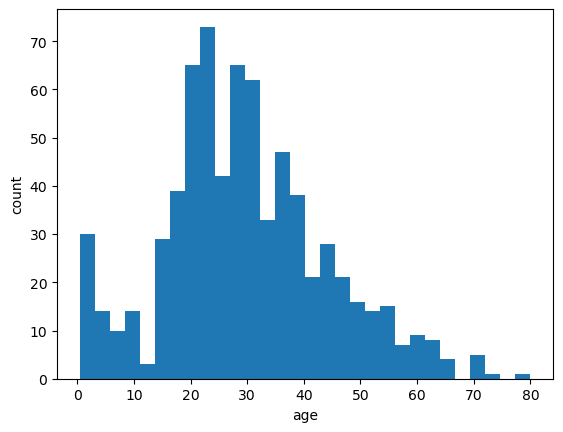

In [162]:
# ANSWER
# First check age distribution
bins=round(np.sqrt(len(titanic['age'])))

plt.hist(titanic.age, bins=bins)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [163]:
# Check age distribution per sex
age_male = titanic[titanic.sex == 'male'].age
age_female = titanic[titanic.sex == 'female'].age
len(age_male), len(age_female)

(577, 314)

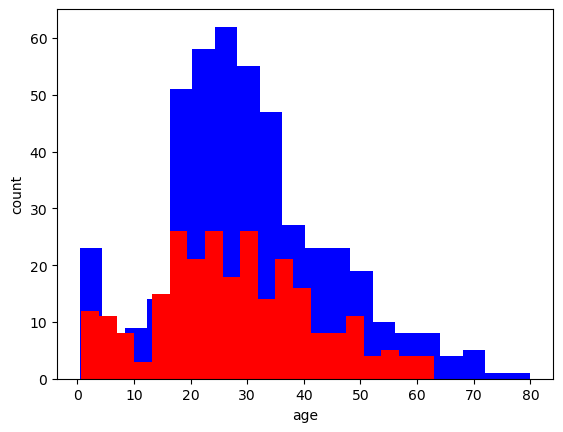

In [164]:
plt.hist(age_male, bins=20, color='blue')
plt.hist(age_female, bins=20, color='red')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [165]:
# Age has only about 20% missing values > Fill missing values by median values of male and female ages
titanic.age.fillna(titanic.groupby(by=['sex'])['age'].transform('median'), inplace=True)

# .transform(): Call func (here: median) on self producing a DataFrame with the same axis shape as self

In [166]:
titanic[titanic.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


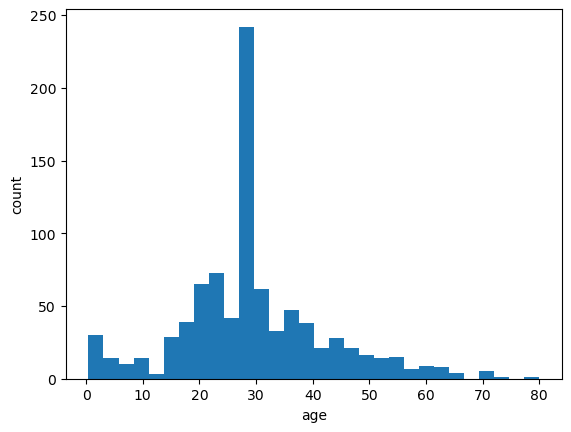

In [167]:
# Age distribution after missing value imputation
plt.hist(titanic.age, bins=bins)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### Cabin

In [168]:
# ANSWER
titanic[titanic.cabin.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S


In [169]:
titanic.cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

In [170]:
#impute cabin:
#remove numbers from cabin, letters remain = cabin_new
#plot cabin distribution grouped by pclass to gain some insight > impute missing values for cabin according to pclass grouping 
#map letters to numbers = cabin_map
#to fill in missing values compute mean of numeric values based on pclass grouping

In [171]:
#remove numbers and keep letters
titanic['cabin_new'] = titanic.cabin.apply(lambda x: x[:1] if type(x) is str else x)

In [172]:
titanic.cabin_new.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_new, dtype: int64

In [173]:
titanic.groupby(by='pclass').cabin_new.value_counts()

pclass  cabin_new
1       C            59
        B            47
        D            29
        E            25
        A            15
        T             1
2       F             8
        D             4
        E             4
3       F             5
        G             4
        E             3
Name: cabin_new, dtype: int64

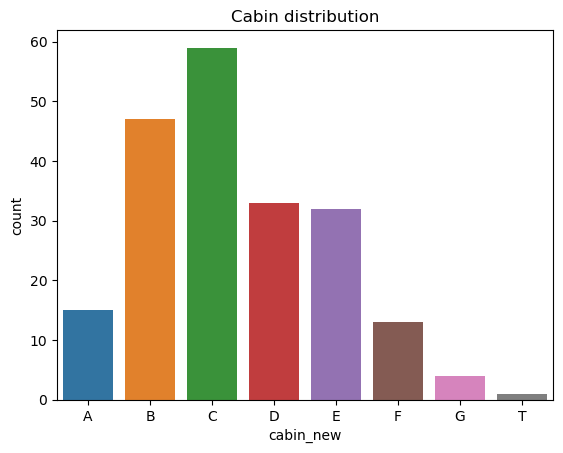

In [174]:
# Plot cabin distribution
levels=['A','B','C','D','E','F','G','T']

sns.countplot(x=titanic.cabin_new, order=levels)
plt.title("Cabin distribution")
plt.show();

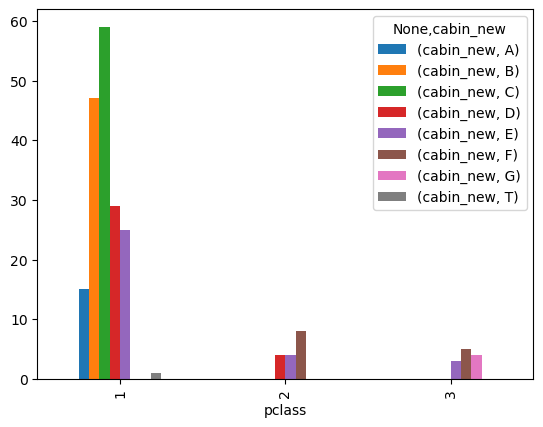

In [175]:
# Plot cabin distribution grouped by pclass
titanic.groupby(by=['pclass', 'cabin_new']).agg({'cabin_new':'count'}).unstack().plot(kind='bar') #.unstack(): long to wide
plt.show()

In [176]:
titanic.cabin_new.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [177]:
#plot shows that feature 'cabin' should be imputed according to pclass grouping, i.e.
#impute cabin w/ E,F,G for pclass 3, w/ D,E,F for pclass 2 and w/ A,B,C,T for pclass 1

In [178]:
cabin_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8,
}

In [179]:
#map letters to numbers = cabin_map
titanic['cabin_map'] = titanic.cabin_new.map(cabin_map)

In [180]:
titanic.groupby(by=['pclass'])['cabin_map'].mean()

pclass
1    3.039773
2    5.250000
3    6.083333
Name: cabin_map, dtype: float64

In [181]:
#compute mean of numeric values based on pclass grouping to fill in missing values
titanic.cabin_map.fillna(titanic.groupby(by=['pclass'])['cabin_map'].transform('mean'), inplace=True)

In [182]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
 12  cabin_new    204 non-null    object 
 13  cabin_map    891 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [183]:
titanic['cabin_map'] = np.round(titanic['cabin_map'], decimals=0)

In [184]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_new,cabin_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,6.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,6.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,6.0


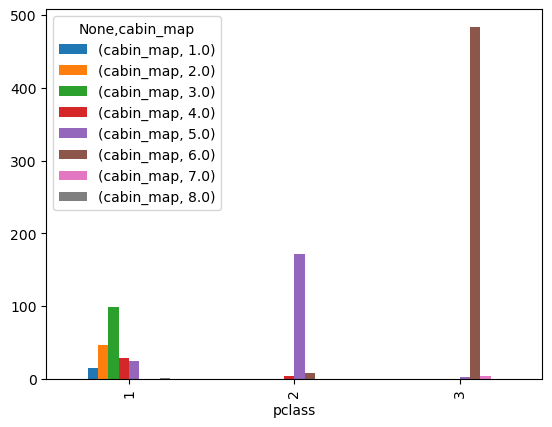

In [185]:
titanic.groupby(by=['pclass', 'cabin_map']).agg({'cabin_map':'count'}).unstack().plot(kind='bar')
plt.show()

### Embarked

In [186]:
# ANSWER
titanic[titanic.embarked.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_new,cabin_map
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,2.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,2.0


In [187]:
#Look up female passengers on internet and set port to S for Southampton
titanic.loc[titanic.embarked.isna(), 'embarked'] = 'S'

#Alternatively
#titanic.embarked = titanic.embarked.apply(lambda x: x if type(x) is str else 'S')

In [188]:
titanic.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

# Describe

Describe your dataset.

In [189]:
# ANSWER
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare,cabin_map
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208,5.079686
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429,1.342203
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,5.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,6.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,6.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [190]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'passengerid': 'count'
    }
    _groupby = ['survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

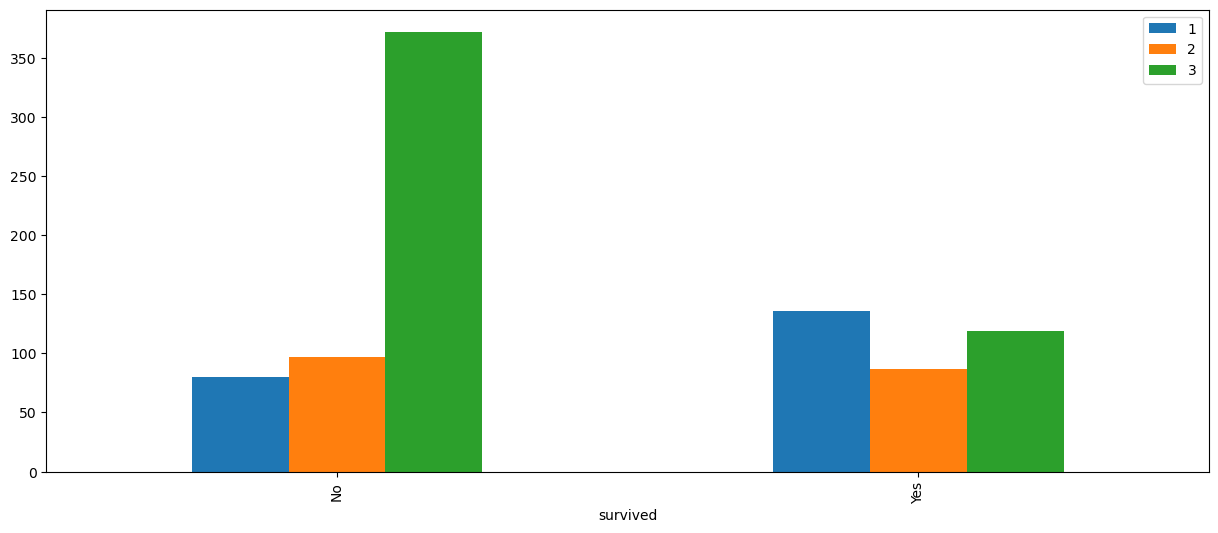

In [191]:
# ANSWER
bar_charts(titanic, 'pclass')

- Most passengers from pclass 3 died

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

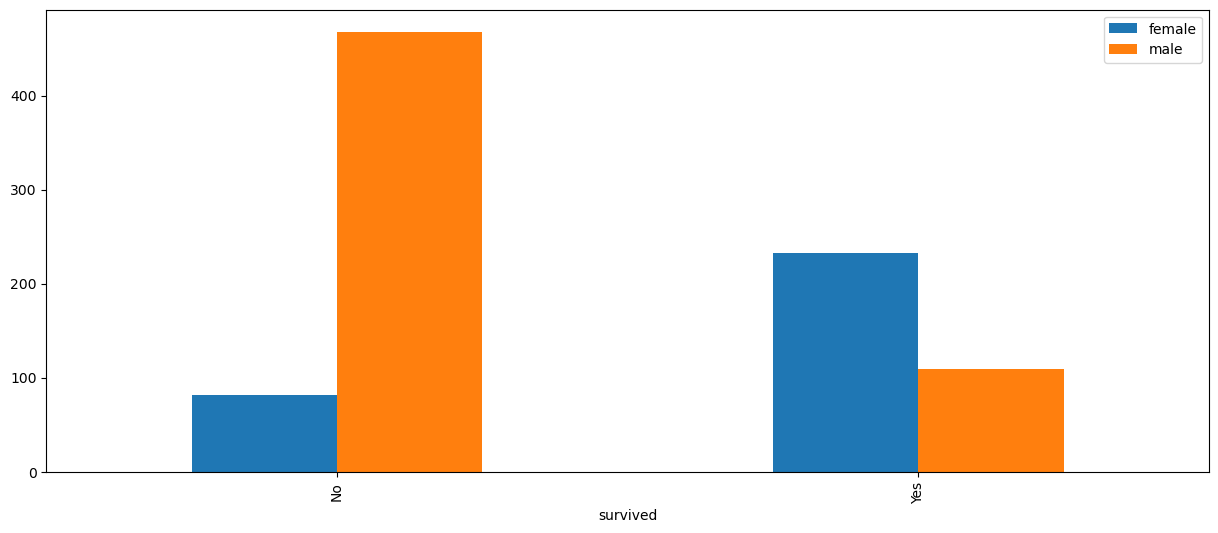

In [192]:
# ANSWER
bar_charts(titanic, 'sex')

- About 5-times more male than female died

In [193]:
# Check survival wrt to sex and Pclass
titanic.groupby(['pclass', 'sex']).survived.value_counts(normalize=True).to_frame()

#almost all female in pclass 1,2 survived, 50% in pclass

survived
pclass sex    survived          
1      female 1         0.968085
              0         0.031915
       male   0         0.631148
              1         0.368852
2      female 1         0.921053
              0         0.078947
       male   0         0.842593
              1         0.157407
3      female 0         0.500000
              1         0.500000
       male   0         0.864553
              1         0.135447

- almost all female in pclass 1 and 2 survived, and 50% in pclass 3

## Parch

Parch = Number of parents of children travelling with each passenger.

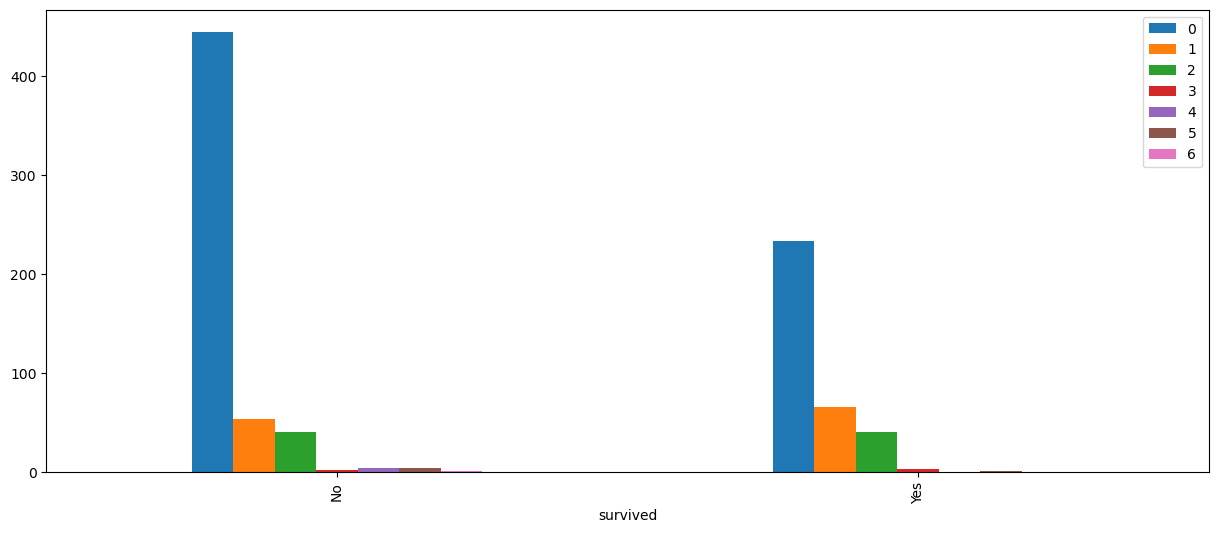

In [194]:
# ANSWER
bar_charts(titanic, 'parch')

- People w/o relatives were more likely to die

## SibSp

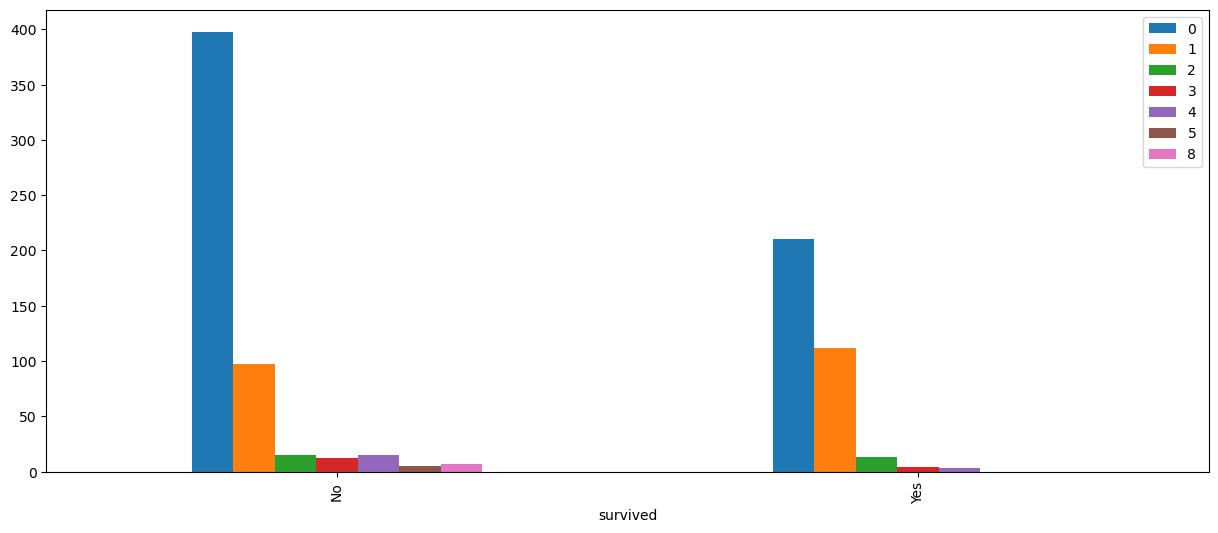

In [195]:
bar_charts(titanic, 'sibsp')

## Embarked

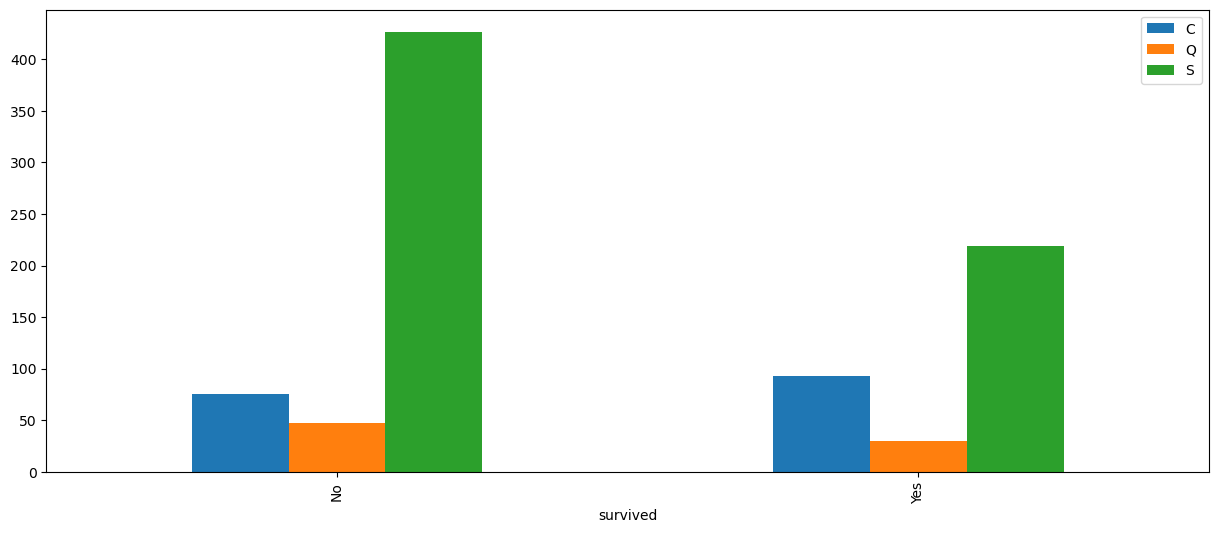

In [196]:
bar_charts(titanic, 'embarked')

- Two third of passengers embarking in Southampton died

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [197]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [198]:
titanic['fare_class'] = titanic['fare'].apply(create_fare_class)

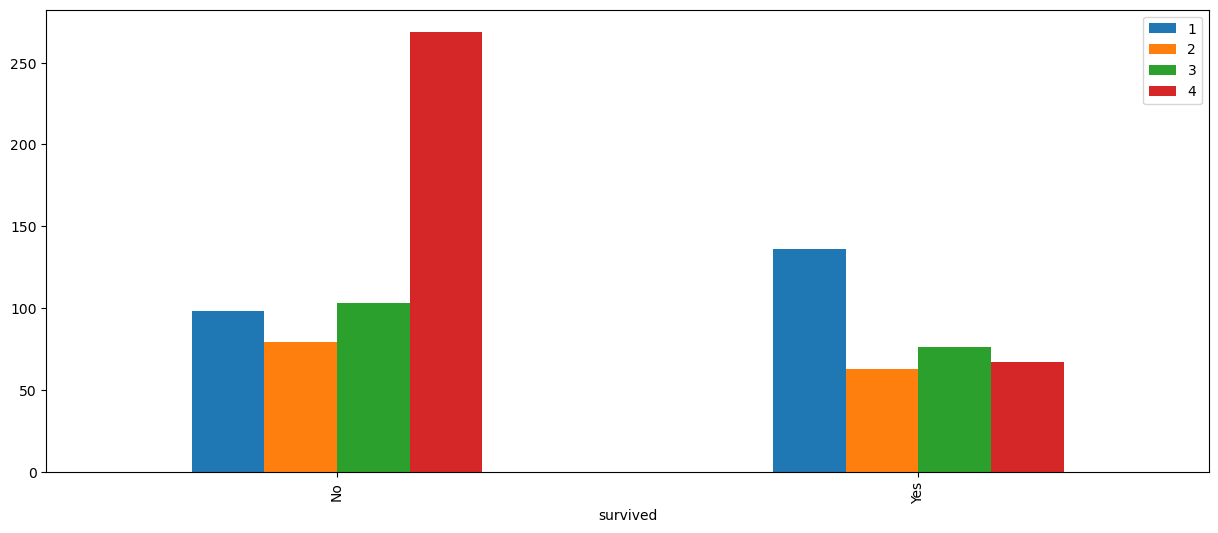

In [199]:
bar_charts(titanic, 'fare_class')

- Those who have paid more were more likely to survive

## Age Class

In [200]:
titanic['age'].value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 88, dtype: int64

In [201]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [202]:
# ANSWER
titanic['age_class'] = titanic['age'].apply(create_age_class)

In [203]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_new,cabin_map,fare_class,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,6.0,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3.0,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,6.0,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,6.0,4,3


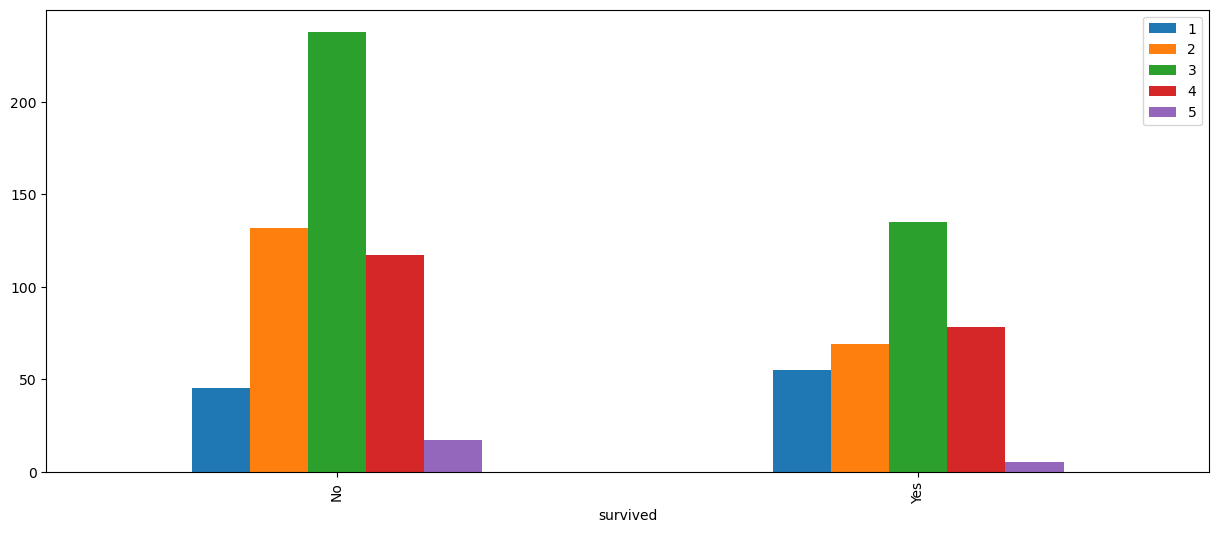

In [204]:
bar_charts(titanic, 'age_class')

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [205]:
titanic.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare,cabin_map,fare_class,age_class
passengerid,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658,-0.040371,0.003258,0.026653
survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,-0.289460,-0.307600,-0.067911
pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,0.896218,0.719670,-0.292128
age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,-0.306896,-0.113032,0.928753
sibsp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,0.080367,-0.380692,-0.232166
parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,0.016520,-0.387100,-0.168121
fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,-0.564177,-0.599129,0.075551
cabin_map,-0.040371,-0.289460,0.896218,-0.306896,0.080367,0.016520,-0.564177,1.000000,0.644342,-0.260644
fare_class,0.003258,-0.307600,0.719670,-0.113032,-0.380692,-0.387100,-0.599129,0.644342,1.000000,-0.080506
age_class,0.026653,-0.067911,-0.292128,0.928753,-0.232166,-0.168121,0.075551,-0.260644,-0.080506,1.000000


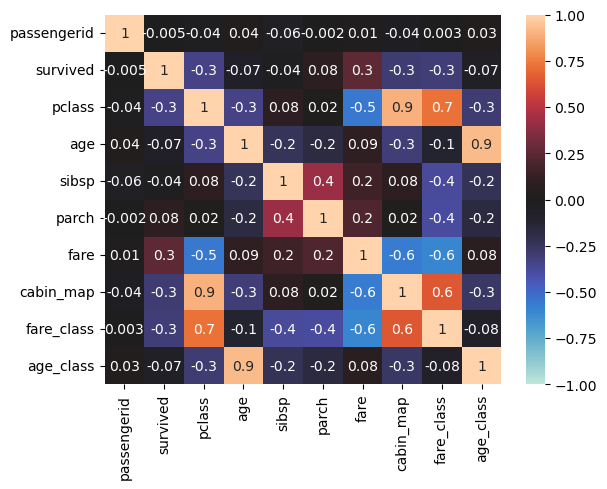

In [206]:
sns.heatmap(titanic.corr(), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0)
plt.show()

#center: The value at which to center the colormap when plotting divergent data
#vmin, vmax: Values to anchor the colormap
#fmt: String formatting code

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [207]:
# ANSWER
N=100
titanic_young = titanic[titanic.age <= 35].sample(N, random_state=42)
titanic_old = titanic[titanic.age > 35].sample(N, random_state=42)

In [208]:
titanic_young['survived'].value_counts()

0    58
1    42
Name: survived, dtype: int64

In [209]:
titanic_old['survived'].value_counts()

0    66
1    34
Name: survived, dtype: int64

### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [210]:
# ANSWER
alpha = 0.05

### Calculate point estimate

In [211]:
a = titanic_young['survived']
b = titanic_old['survived']

In [212]:
# ddof: delta degrees of freedom
# ddof=0: variance on population 
# ddof=1: variance on sample
# > ddof should be 1 here

## Calculate the variance to get the standard deviation
var_a = a.var() #default ddof=1
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [213]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s * np.sqrt(2/N))
t

1.1635489477654783

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [214]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [215]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 1.1635489477654783
p = 0.24600709750864613


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [216]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [217]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a, b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 1.1635489477654786
p = 0.246007097508646
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



